In [76]:
import pickle
import os
import numpy as np
import skimage as ski
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt

In [86]:
def transform_and_load_images(data_path):
    target_wd = 64
    target_ht = 64
    img_list = []

    def transform(data, target_wd, target_ht):
        # resize to target_wd * target_ht
        data = resize(data, (target_wd, target_ht))
        # transpose from (target_wd, target_ht, 3)
        # to (target_wd, target_ht, 3)
        try:
            data = data.reshape((target_wd, target_ht, 3))
        except:
            print("reshape failed")
            print(data.shape)
            if len(data.shape)==2:
#                 data = np.tile(data,(3,1,1)).reshape(target_wd, target_ht, 3)
                data = np.concatenate([data[..., np.newaxis]]*3, axis=2)
        # normalize to [0, 255]
        data = (data*255).astype(np.uint8)
        # if image is greyscale, repeat 3 times to get RGB image.
        return data

    for path, _, fnames in os.walk(data_path):
        for fname in fnames:
#             print(fname)
            if not fname.endswith('.jpg'):
                continue
            img = os.path.join(path, fname)
            try:
                img_arr = imread(img)
            except:
                print("imread failed")
                continue
            img_arr = transform(img_arr, target_wd, target_ht)
            img_list.append(img_arr)
    return img_list

In [87]:
arr = transform_and_load_images("/Users/arnediehl/proc/dataset/Bellsprout")

reshape failed
(64, 64)
reshape failed
(64, 64)


In [91]:
with open('/Users/arnediehl/proc/pokeset', 'wb') as fp:
    pickle.dump(np.asarray(arr), fp)

In [90]:
len(arr)

55

In [89]:
len(img4.shape)

3

In [57]:
img5 = img4[1,:,:]

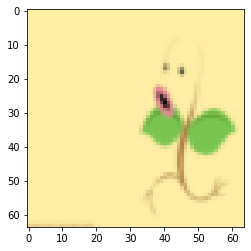

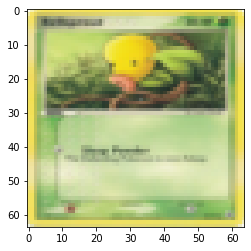

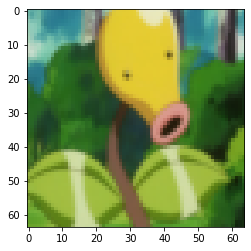

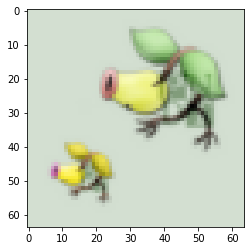

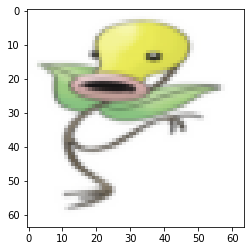

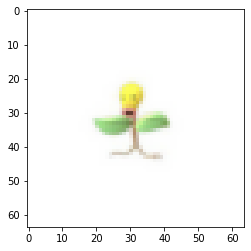

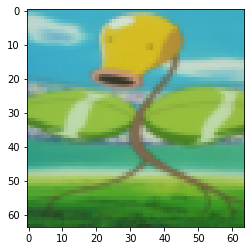

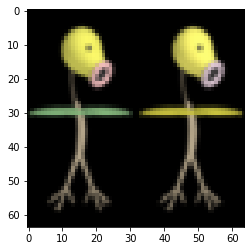

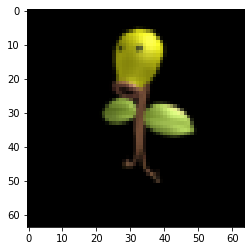

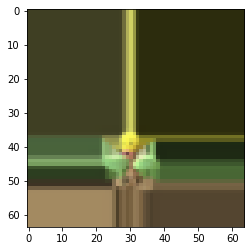

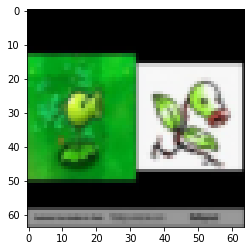

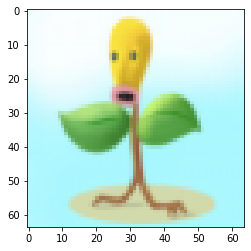

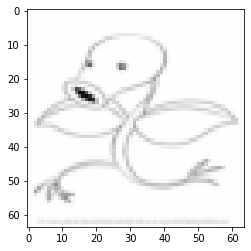

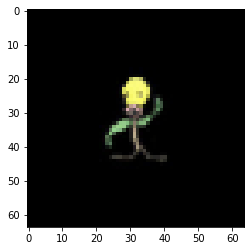

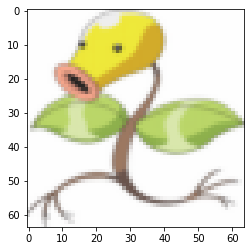

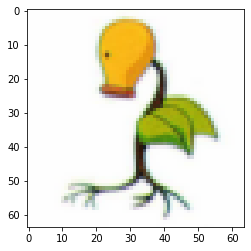

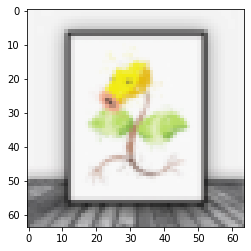

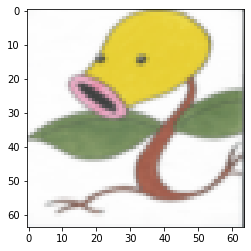

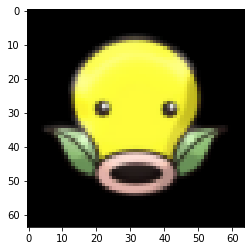

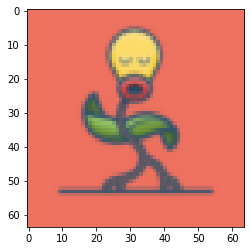

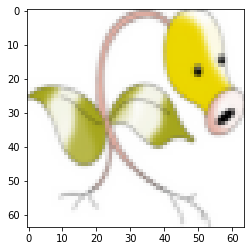

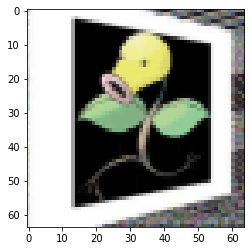

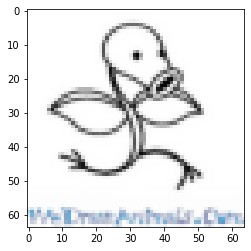

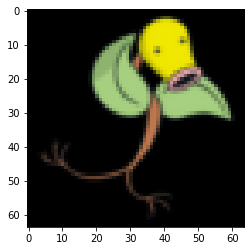

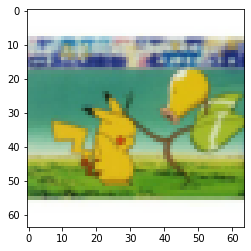

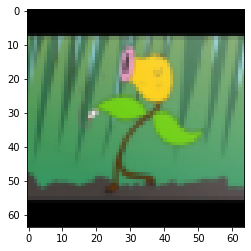

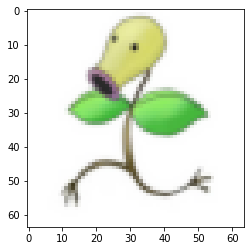

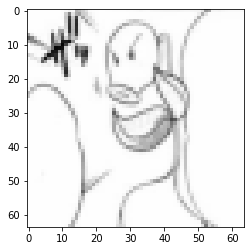

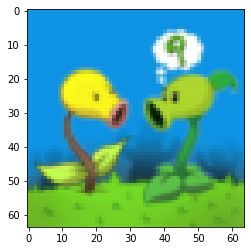

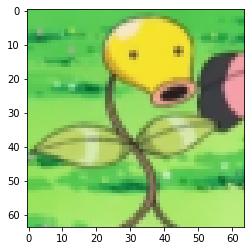

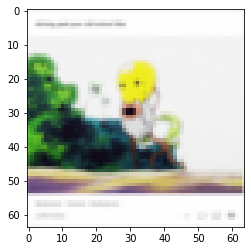

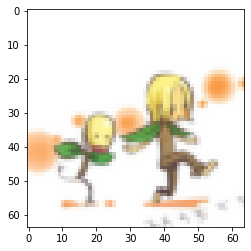

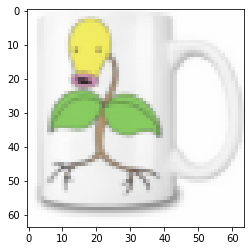

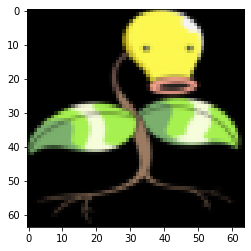

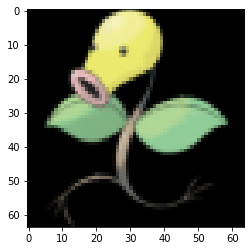

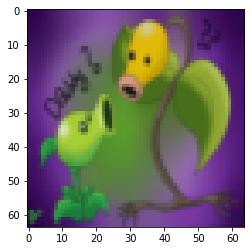

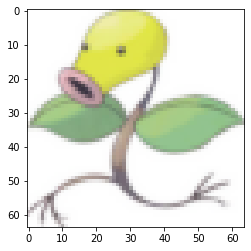

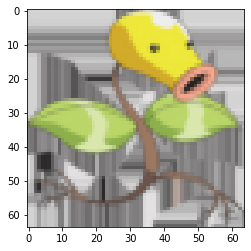

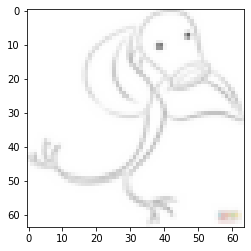

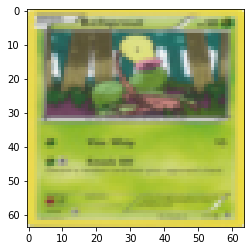

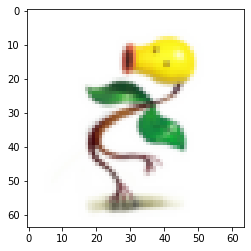

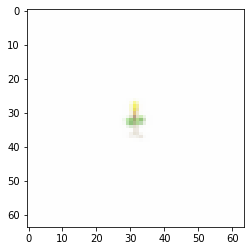

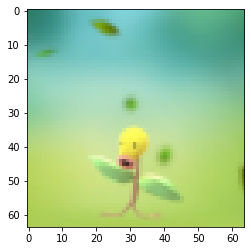

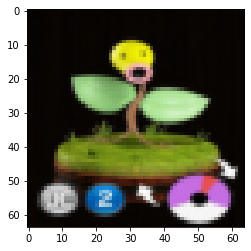

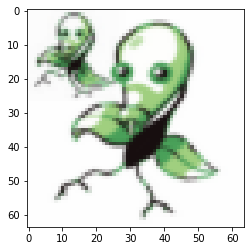

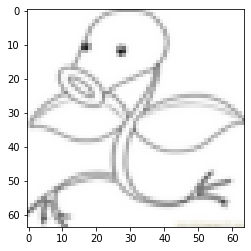

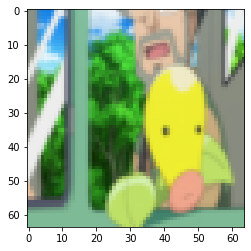

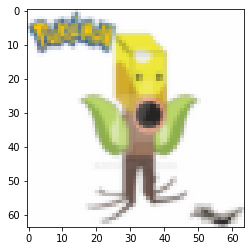

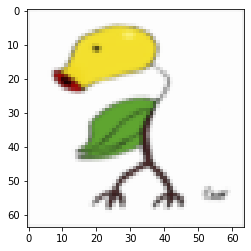

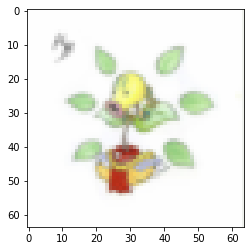

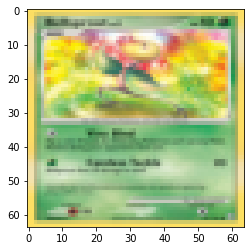

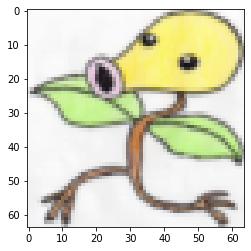

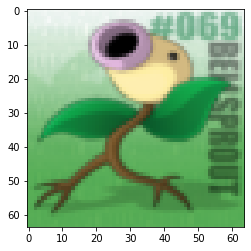

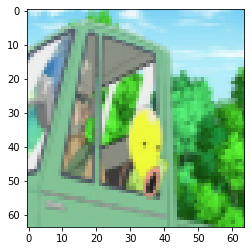

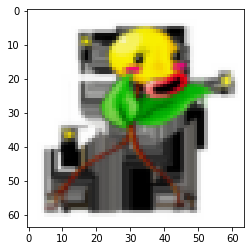

In [93]:
with open('/Users/arnediehl/proc/pokeset', 'rb') as fp:
    faceset = pickle.load(fp)

for image in faceset:
    plt.imshow(image)
    plt.show()